In [395]:
import numpy as np

import pandas as pd
from pandas.api.types import CategoricalDtype

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Plot settings
plt.rcParams['figure.figsize'] = (12, 9)
plt.rcParams['font.size'] = 12

In [396]:
chicago_housing = pd.read_csv('chicagohousingdata.csv')

In [397]:
chicago_housing.head()

,PIN,Property Class,Tax Year,Neighborhood Code,Land Square Feet,Town Code,Type of Residence,Apartments,Wall Material,Roof Material,...,Property Address,Modeling Group,Full Baths,Age,Use,Number of Units,Percent Ownership,Condo Class Factor,Multi-Family Indicator,Large Lot
0,1122120360000,203,2018,22,6309,10,1.0,0.0,1.0,4.0,...,506 PARK BARRINGTON WAY BARRINGTON,SF,2,25,1,1,1.0,NaN,NaN,0
1,1122120370000,203,2018,22,6851,10,1.0,0.0,1.0,4.0,...,504 PARK BARRINGTON WAY BARRINGTON,SF,2,25,1,1,1.0,NaN,NaN,0
2,1123030440000,295,2018,31,3678,10,2.0,0.0,3.0,1.0,...,506 STONE CANYON CIR INVERNESS,SF,3,16,1,1,1.0,NaN,NaN,0
3,1123030450000,295,2018,31,2919,10,2.0,0.0,3.0,1.0,...,504 STONE CANYON CIR INVERNESS,SF,2,16,1,1,1.0,NaN,NaN,0
4,1123030460000,295,2018,31,2925,10,2.0,0.0,3.0,1.0,...,502 STONE CANYON CIR INVERNESS,SF,2,16,1,1,1.0,NaN,NaN,0


In [398]:
chicago_housing['Land Square Feet'].head()

0    6309
1    6851
2    3678
3    2919
4    2925
Name: Land Square Feet, dtype: int64

In [399]:
len_data = len(chicago_housing)

In [400]:
chicago_housing.columns.values

array(['PIN', 'Property Class', 'Tax Year', 'Neighborhood Code',
       'Land Square Feet', 'Town Code', 'Type of Residence', 'Apartments',
       'Wall Material', 'Roof Material', 'Rooms', 'Bedrooms', 'Basement',
       'Basement Finish', 'Central Heating', 'Other Heating',
       'Central Air', 'Fireplaces', 'Attic Type', 'Attic Finish',
       'Half Baths', 'Design Plan', 'Cathedral Ceiling',
       'Construction Quality', 'Renovation', 'Site Desireability',
       'Garage 1 Size', 'Garage 1 Material', 'Garage 1 Attachment',
       'Garage 1 Area', 'Garage 2 Size', 'Garage 2 Material',
       'Garage 2 Attachment', 'Garage 2 Area', 'Porch',
       'Other Improvements', 'Building Square Feet', 'Repair Condition',
       'Multi Code', 'Number of Commercial Units',
       'Prior Tax Year Market Value Estimate (Land)',
       'Prior Tax Year Market Value Estimate (Building)', 'Sale Date',
       'Deed No.', 'Sale Price', 'Longitude', 'Latitude', 'Census Tract',
       'Total Building Sq

In [401]:
chicago_housing['Land Square Feet']

0            6309
1            6851
2            3678
3            2919
4            2925
5            3666
6            3568
7            2812
8            2841
9            3619
10           3674
11           3689
12           3573
13           2836
14           3041
15           3556
16         593392
17           3705
18         593392
19           3567
20           3699
21         593392
22           3642
23           3620
24           2844
25        1758562
26           2842
27           3614
28           3685
29           3690
           ...   
355310       3875
355311       3875
355312       3875
355313       4000
355314       4375
355315       3750
355316       3750
355317       3750
355318       4556
355319       3750
355320       3750
355321       3750
355322       3750
355323       3750
355324       3750
355325       3750
355326       3750
355327       3750
355328       2700
355329       2700
355330       2700
355331       2700
355332       2700
355333       2700
355334    

In [402]:
chicago_housing['Fireplaces']

0         1.0
1         1.0
2         1.0
3         1.0
4         1.0
5         1.0
6         1.0
7         1.0
8         1.0
9         1.0
10        1.0
11        1.0
12        1.0
13        1.0
14        1.0
15        1.0
16        NaN
17        1.0
18        NaN
19        1.0
20        1.0
21        NaN
22        1.0
23        1.0
24        1.0
25        NaN
26        1.0
27        1.0
28        1.0
29        1.0
         ... 
355310    0.0
355311    0.0
355312    0.0
355313    0.0
355314    0.0
355315    0.0
355316    0.0
355317    0.0
355318    0.0
355319    0.0
355320    0.0
355321    1.0
355322    0.0
355323    0.0
355324    0.0
355325    0.0
355326    2.0
355327    0.0
355328    0.0
355329    0.0
355330    0.0
355331    0.0
355332    1.0
355333    0.0
355334    0.0
355335    0.0
355336    0.0
355337    0.0
355338    0.0
355339    1.0
Name: Fireplaces, Length: 355340, dtype: float64

In [403]:
chicago_housing = chicago_housing.dropna(subset=['Sale Price', 
                                                 'Land Square Feet', 
                                                 'Rooms', 
                                                 'Prior Tax Year Market Value Estimate (Land)', 
                                                 'Prior Tax Year Market Value Estimate (Building)',
                                                 'Full Baths',
                                                 'Building Square Feet'])

chicago_housing = chicago_housing[chicago_housing['Sale Price'] != 1]
chicago_housing = chicago_housing[chicago_housing['Prior Tax Year Market Value Estimate (Building)'] != 0]

In [404]:
chicago_housing['Prior Tax Year Market Value Estimate (Building)'].value_counts()

118970     29
138930      7
196520      7
98270       6
208710      6
157140      6
225390      6
231250      6
189050      6
203390      5
146300      5
231030      5
152640      5
156320      5
187700      5
172870      5
248080      5
125360      5
154550      5
144690      5
177070      5
254270      5
174490      5
171990      5
140700      5
142480      5
221200      5
131470      5
209250      5
159920      5
           ..
376050      1
200520      1
278350      1
221010      1
285260      1
287630      1
81430       1
757640      1
477090      1
458630      1
211930      1
323460      1
149690      1
216960      1
302970      1
208250      1
225140      1
928090      1
1728370     1
754830      1
147310      1
1650540     1
204650      1
561000      1
261990      1
155490      1
376670      1
434010      1
135000      1
161010      1
Name: Prior Tax Year Market Value Estimate (Building), Length: 17154, dtype: int64

In [405]:
chicago_housing['Age'].head()

39    13
77    10
92    10
93    10
99     9
Name: Age, dtype: int64

In [406]:
full_data = chicago_housing

In [407]:
full_data_len = len(chicago_housing)

In [408]:
# This makes the train-test split in this section reproducible across different runs 
# of the notebook. You do not need this line to run train_test_split in general
np.random.seed(1338)
shuffled_indices = np.random.permutation(full_data_len)

# Set train_indices to the first 80% of shuffled_indices and and test_indices to the rest.
train_indices = shuffled_indices[:int(full_data_len * 0.8)] # SOLUTION
test_indices = shuffled_indices[int(full_data_len * 0.2):] # SOLUTION

# Create train and test` by indexing into `full_data` using 
# `train_indices` and `test_indices`
train_data = full_data.iloc[train_indices] # SOLUTION
test_data = full_data.iloc[test_indices] # SOLUTION

Now that we have a test set, we will split the training and testing data in two parts again for our own analysis.

In [409]:
train_data_len = len(train_data)

In [410]:


# This makes the train-test split in this section reproducible across different runs 
# of the notebook. You do not need this line to run train_test_split in general
np.random.seed(1338)
shuffled_indices = np.random.permutation(train_data_len)

# Set train_indices to the first 80% of shuffled_indices and and test_indices to the rest.
train_indices_train = shuffled_indices[:int(train_data_len * 0.8)] # SOLUTION
test_indices_train = shuffled_indices[int(train_data_len * 0.2):] # SOLUTION

# Create train and test` by indexing into `full_data` using 
# `train_indices` and `test_indices`
train = train_data.iloc[train_indices_train] # SOLUTION
test = train_data.iloc[test_indices_train] # SOLUTION


In [411]:
train['Land Square Feet'].head()

32692     10660
260891     4962
139312     1744
257179     7044
273399     9331
Name: Land Square Feet, dtype: int64

In [412]:
train['Sale Price'].head()

32692     234000.0
260891    265000.0
139312    205000.0
257179    305000.0
273399    280000.0
Name: Sale Price, dtype: float64

In [413]:
def select_columns(data, *columns):
    """Select only columns passed as arguments."""
    return data.loc[:, columns]

def process_data_gm(data):
    """Process the data for a guided model."""
    
    # Transform Data, Select Features
    data = select_columns(data, 
                          'Sale Price', 
                          'Land Square Feet',
                          'Prior Tax Year Market Value Estimate (Land)',
                          'Prior Tax Year Market Value Estimate (Building)',
                          'Full Baths',
                          'Building Square Feet',
                          'Rooms',
                          'Fireplaces',
                          
                          
                         )
    
    # Return predictors and response variables separately
    X = data.drop(['Sale Price'], axis = 1)
    y = data.loc[:, 'Sale Price']
    
    return X, y

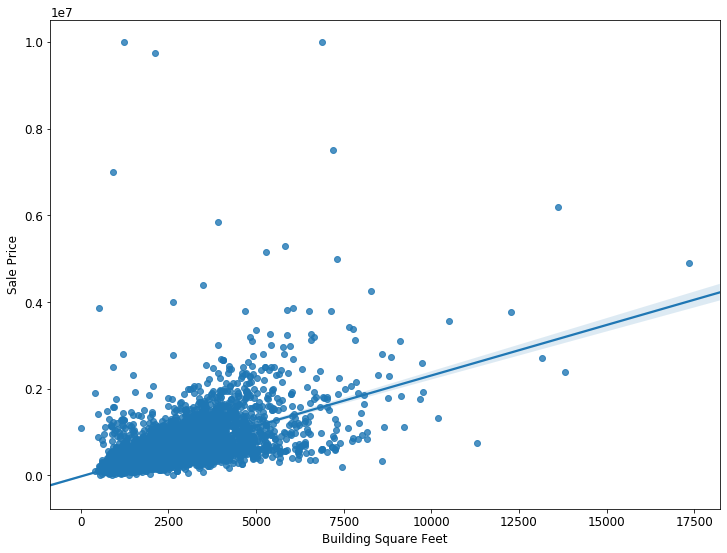

In [414]:
sns.regplot(data=train, x='Building Square Feet', y='Sale Price');

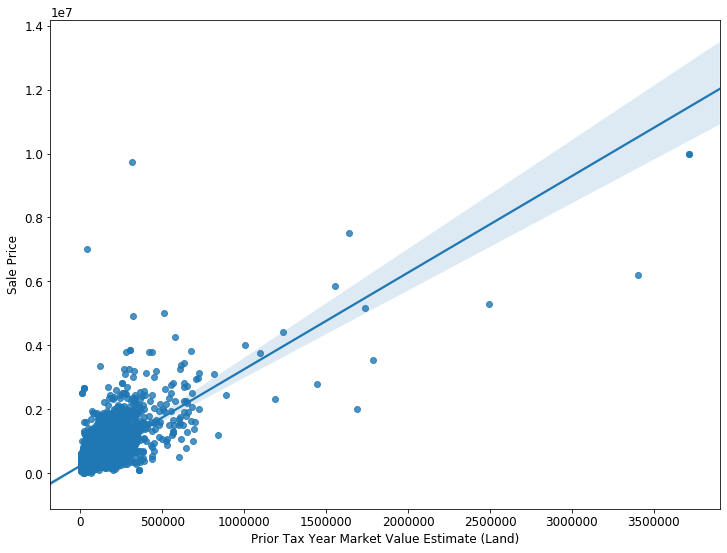

In [415]:
sns.regplot(data=train, x='Prior Tax Year Market Value Estimate (Land)', y='Sale Price');

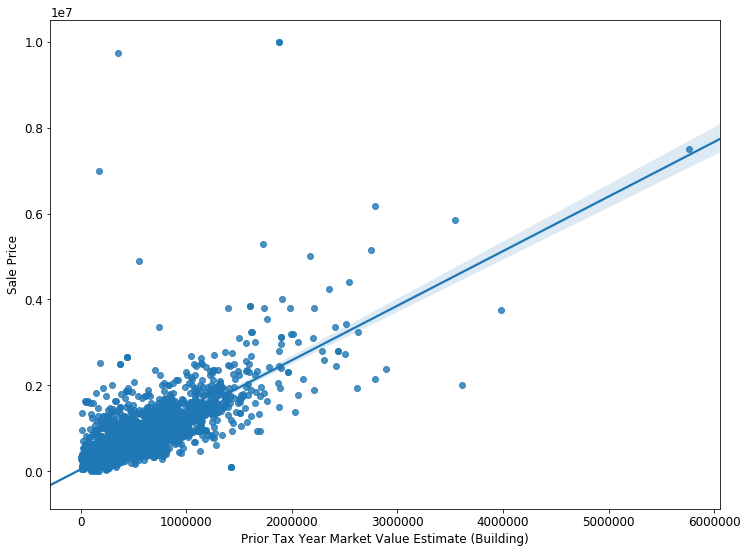

In [416]:
sns.regplot(data=train, x='Prior Tax Year Market Value Estimate (Building)', y='Sale Price');

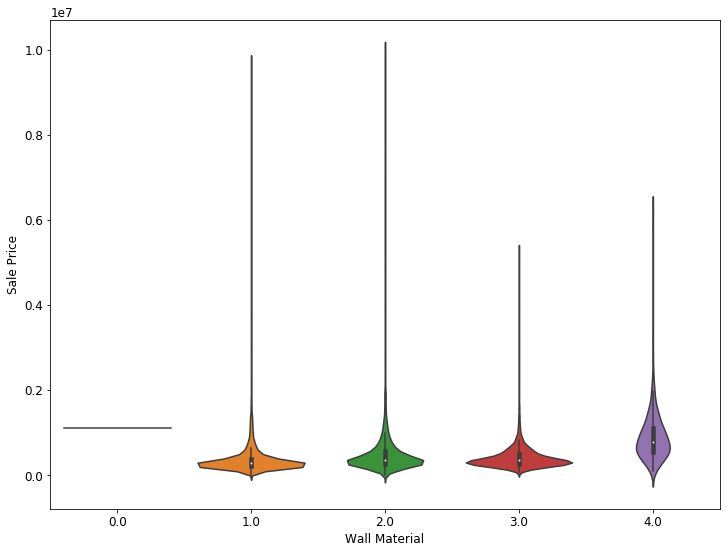

In [417]:
sns.violinplot(data=train, x='Wall Material', y='Sale Price');

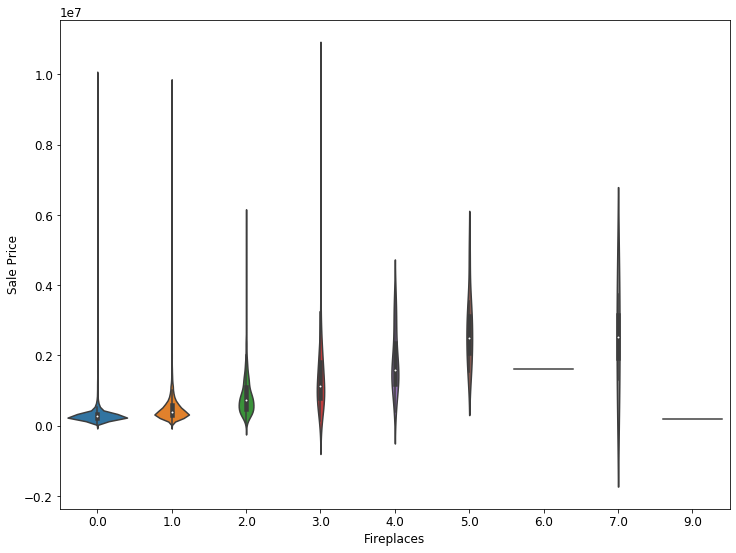

In [418]:
sns.violinplot(data=train, x='Fireplaces', y='Sale Price');

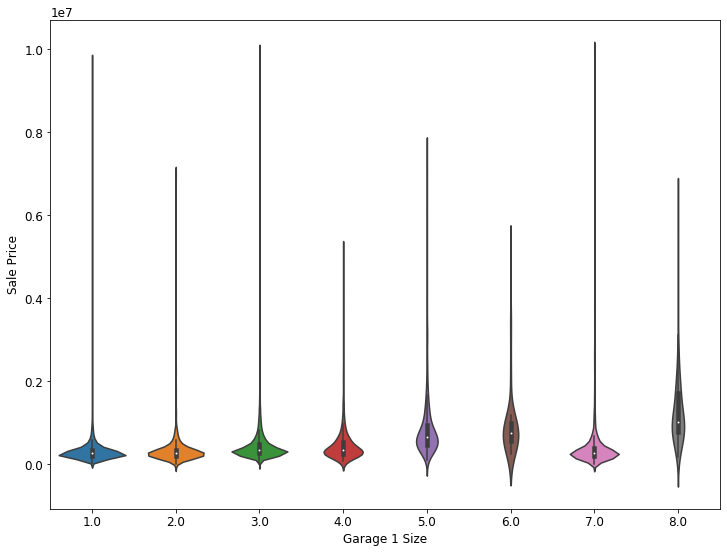

In [419]:
sns.violinplot(data=train, x='Garage 1 Size', y='Sale Price');

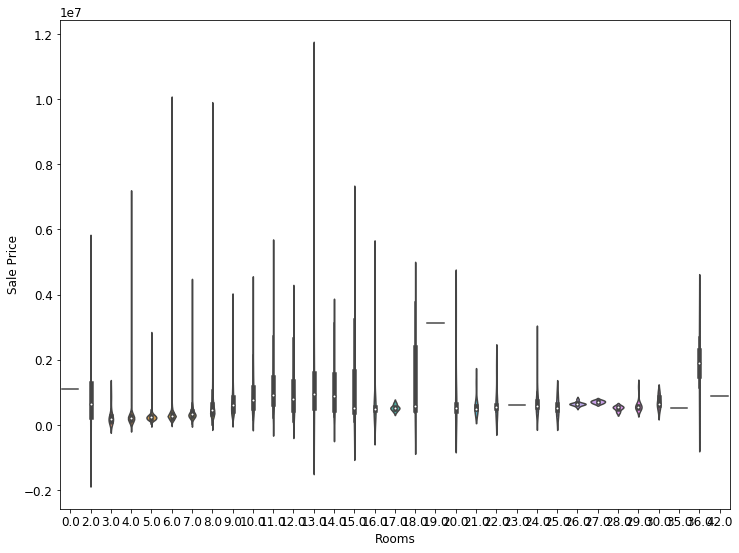

In [420]:
sns.violinplot(data=train, x='Rooms', y='Sale Price');

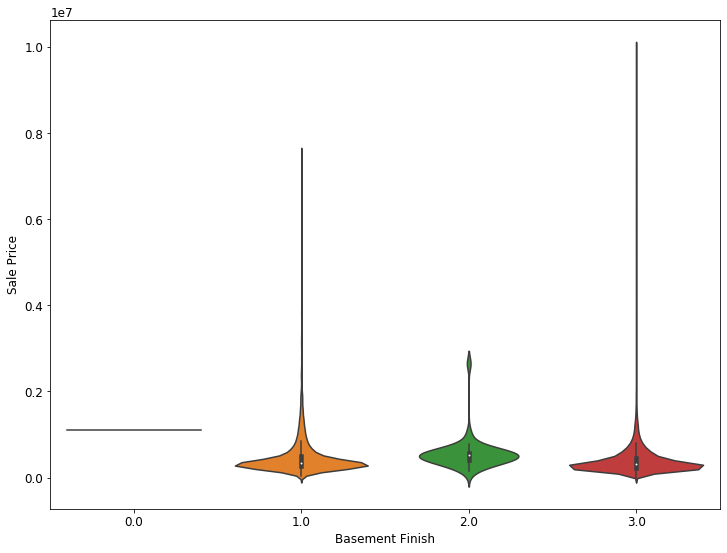

In [421]:
sns.violinplot(data=train, x='Basement Finish', y='Sale Price');

In [422]:
train['Basement Finish'].value_counts()

3.0    9571
1.0    4862
2.0     116
0.0       1
Name: Basement Finish, dtype: int64

In [437]:
def select_columns(data, *columns):
    """Select only columns passed as arguments."""
    return data.loc[:, columns]

def process_data_gm(data):
    """Process the data for a guided model."""
    
    # Transform Data, Select Features
    data = select_columns(data, 
                          'Sale Price', 
                          'Land Square Feet',
                          'Prior Tax Year Market Value Estimate (Land)',
                          'Prior Tax Year Market Value Estimate (Building)',
                          'Full Baths',
                          'Building Square Feet',
                          'Rooms',
                          'Fireplaces',
                          'Garage 1 Size',
                          'Repair Condition'
                          
                          
                         )
    
    # Return predictors and response variables separately
    X = data.drop(['Sale Price'], axis = 1)
    y = data.loc[:, 'Sale Price']
    
    return X, y

In [438]:
X_train, y_train = process_data_gm(train)
X_test, y_test = process_data_gm(test)

In [439]:
# X_train = train['Land Square Feet']
# Y_train = train['Sale Price']
# X_test = test['Land Square Feet']
# Y_test = test['Sale Price']

In [440]:
from sklearn import linear_model as lm

linear_model = lm.LinearRegression(fit_intercept=True)

In [441]:
len(X_train)

14550

In [442]:
linear_model.fit(X_train, y_train)
y_fitted = linear_model.predict(X_train)
y_predicted = linear_model.predict(X_test)

In [443]:
def rmse(actual, predicted):
    """
    Calculates RMSE from actual and predicted values
    Input:
      actual (1D array): vector of actual values
      predicted (1D array): vector of predicted/fitted values
    Output:
      a float, the root-mean square error
    """
    return np.sqrt(np.mean((actual - predicted)**2))

In [444]:
training_error = rmse(y_fitted, y_train) # SOLUTION
test_error = rmse(y_predicted, y_test) # SOLUTION
(training_error, test_error)

(191630.88227662188, 180020.83688834053)

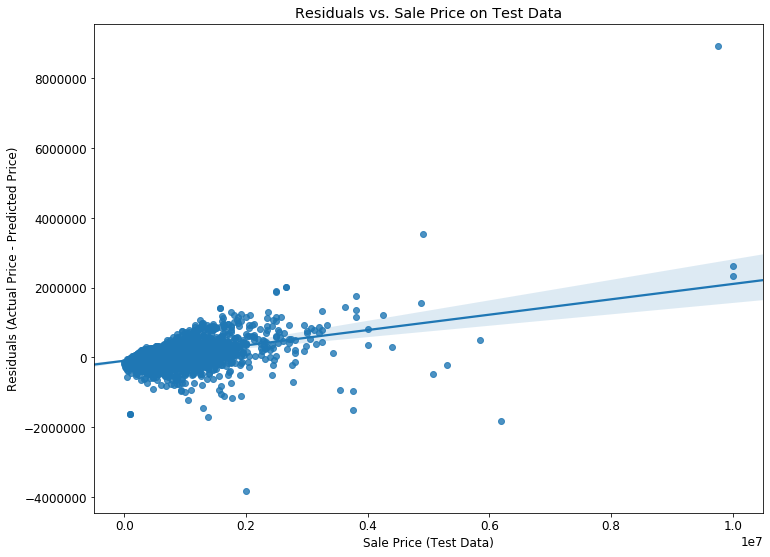

In [445]:
residuals = y_test - y_predicted
ax = sns.regplot(y_test, residuals)
ax.set_xlabel('Sale Price (Test Data)')
ax.set_ylabel('Residuals (Actual Price - Predicted Price)')
ax.set_title("Residuals vs. Sale Price on Test Data");